![](img/shark.png)

# Global Shark Attack

Fecha de entrega: _23:59 05/04/2021_ 

### ¿En qué consiste este mini-proyecto?

El objetivo de este mini-proyecto es que os enfrentéis a realizar un Exploratory Data Analysis por primera vez, antes del proyecto EDA. 

Durante este mini-proyecto deberás poner en práctica todo lo aprendido durante las últimas semanas. Tanto cómo te haga falta y solo si te hace falta. Esta vez serás tú el qué tome la decisión de qué tratamientos o limpiezas y visualizaciones serán mejor para tratar tus datos. 

Mínimo deberás importar las siguientes librerías, aunque te animo a explorar otras librerías nuevas.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```

Todo esto con el fin de poder verificar nuestra hipótesis. Sigue leyendo para más información.

### Dataset

El dataset que utilizaremos para este mini-proyecto contiene datos sobre los ataques de tiburones en el mundo: localicación, fechas, tipología, especie causante, información sobre las víctimas, etc.. 

Registrado por http://www.sharkattackfile.net/index.htm.

Te lo podrás descargar en este enlace: https://www.kaggle.com/teajay/global-shark-attacks

### Hipótesis
Elige una o varias de estas hipótesis para desarrollar tu mini proyecto.

Siéntete libre de establecer nuevas hipótesis que puedas validar o rechazar con tu análisis.

- El número de supervivientes ha aumentado con el paso de los años
- Todos los ataques producidos en la India, ocurren a primera hora de la mañana
- La mayoría de los ataques en los últimos 200 años tuvieron lugar en USA, Australia y Sudáfrica. 
- Las actividades con más riesgo de sufrir un ataque de tiburon son pescar y nadar. 
- La mayoría de los ataques de tiburón fueron fatales.
- Los tiburones tienen especial predilección por los surferos.
- Reunion Island es el lugar del mundo donde ocurren más ataques de tiburón en terminos relativos.
- En Sudáfrica hay más ataques letales a mujeres que en Australia.

### Github*
*_Este punto es opcional pero MUY recomendable, ya que en el Proyecto de EDA será obligatorio_

Crea un repositorio nuevo para guardar los archivos que necesites.

Sigue la siguiente estructuras de carpetas:

    - src -> aquí encontrarás el código, en este caso los notebooks que uses
    - input -> aquí guardarás el dataset que utilices
    - output -> aquí guardarás gráficas o datasets limpios, si los tuvieras

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import random

In [8]:

shark = pd.read_csv('attacks.csv', encoding = 'latin1')

In [197]:
shark.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,survivor
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,survivor
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,survivor
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,survivor
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,survivor
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,survivor


In [33]:
shark['Date'].replace(['Reported'],"")

0        25-Jun-2018
1        18-Jun-2018
2        09-Jun-2018
3        08-Jun-2018
4        04-Jun-2018
            ...     
25718            NaN
25719            NaN
25720            NaN
25721            NaN
25722            NaN
Name: Date, Length: 25723, dtype: object

In [57]:
shark1=shark.drop(range(6302, 25723, 1),axis=0)

In [58]:
print("DataFrame shape:",shark1.shape)
print('\n')
print('DataFrame info:', shark1.info())
print('\n')
print('DataFrame columns:',shark1.columns)
print('\n')
print('tupe pf each column',shark1.dtypes)
print('\n')
print('How many missing in every column:',shark1.isna().sum ())
print('\n')
print('estadisticas numericas colum: ' ,shark1.describe())

DataFrame shape: (6302, 25)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species   

In [80]:
#El número de ataques ha aumentado con el paso de los años?
# y el numero de supervivientes?

In [134]:
Years_values1 = shark1['Year'].value_counts().head(20).sort_index(ascending = False)
Years_values1


2017.0    136
2016.0    130
2015.0    143
2014.0    127
2013.0    122
2012.0    117
2011.0    128
2010.0    101
2009.0    120
2008.0    122
2007.0    112
2006.0    103
2005.0    103
2004.0     92
2003.0     92
2001.0     92
2000.0     97
1960.0     93
1959.0     93
0.0       125
Name: Year, dtype: int64

<AxesSubplot:title={'center':'Shark Attacks per year'}>

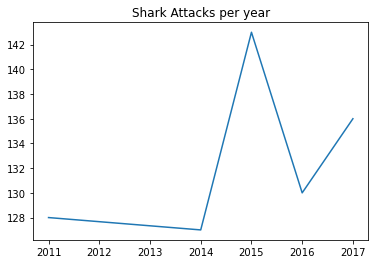

In [137]:
Years_values1 = shark1['Year'].value_counts().head().sort_index(ascending = False)
Years_values1
%matplotlib inline
Years_values1.plot(title="Shark Attacks per year")


In [ ]:
'''Ha habido un repunte de ataques en el año 2015 y el resto de años tambíen suben con respecto al anterior  '''

In [115]:
shark1['survivor']=shark1['Fatal (Y/N)']
shark1.loc[shark['Fatal (Y/N)']== 'N','survivor']='survivor'
shark1.loc[shark['Fatal (Y/N)']== ' N','survivor']='survivor'
shark1.loc[shark['Fatal (Y/N)']== 'Y','survivor']='not survivor'
shark1.loc[shark['Fatal (Y/N)']== 'y','survivor']='not survivor'
shark1.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,survivor,Year_cleaned
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,survivor,2018.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,survivor,2018.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,survivor,2018.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,survivor,2018.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,survivor,2018.0


In [122]:
shark2=shark1[["Year", "survivor"]]
shark2

,Year,survivor
0,2018.0,survivor
1,2018.0,survivor
2,2018.0,survivor
3,2018.0,survivor
4,2018.0,survivor
...,...,...
6297,0.0,not survivor
6298,0.0,not survivor
6299,0.0,not survivor
6300,0.0,not survivor


In [132]:
shark_survivor=shark2['survivor']=='survivor'
filtered_df = shark2[shark_survivor]
print(filtered_df)

        Year  survivor
0     2018.0  survivor
1     2018.0  survivor
2     2018.0  survivor
3     2018.0  survivor
4     2018.0  survivor
...      ...       ...
6283     0.0  survivor
6284     0.0  survivor
6288     0.0  survivor
6291     0.0  survivor
6292     0.0  survivor

[4300 rows x 2 columns]


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


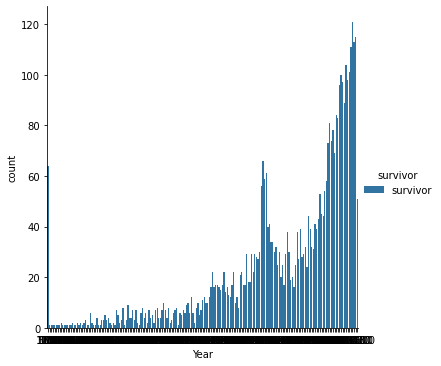

In [133]:
sns.catplot('Year',data=filtered_df, hue='survivor',kind='count')

In [ ]:
''' El numero de supervivientes aumenta con los años'''

In [163]:
# son mortales los ataques de tiburones?

<AxesSubplot:title={'center':'Son mortales?'}>

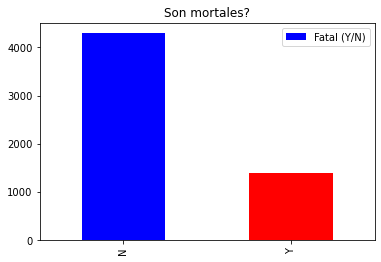

In [164]:
shark1[shark1['Fatal (Y/N)'].isin(['Y','N'])]["Fatal (Y/N)"].value_counts()\
    .plot(kind='bar', title= "Son mortales?",legend = True, color= ['blue','red'])

In [ ]:
#¿cual es la edad de las victimas?

<AxesSubplot:title={'center':'Edad de las victimas'}>

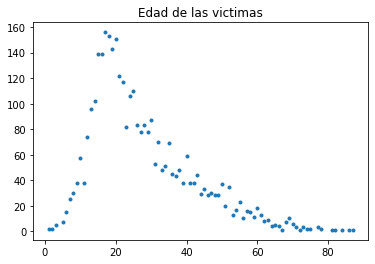

In [165]:
shark1['Age_Clean'] = shark1['Age'].str.extract("([0-9]+)", expand=False).dropna().astype(int)
age_values = shark1['Age_Clean'].value_counts().sort_index()
age_values.plot(style=".",title = "Edad de las victimas")

In [196]:
# Es el surf es la actividad que mas peligro de ataque tiene?

<AxesSubplot:>

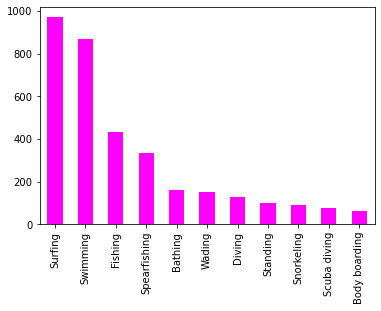

In [195]:
shark1.groupby("Activity").filter(lambda x: len(x) > 50).Activity.value_counts().plot.bar(color='fuchsia')

In [198]:
shark1.to_csv('shark1_cleaned.csv',index=False)